In [13]:
from LUNA16.utils.analyze_folders import analyze_folder
from LUNA16.utils.analyze_data_distribution import read_mhd
from LUNA16.utils.LUNAdatastore import LUNAdatastore
import matplotlib.pyplot as plt
import random
import dask
import dask.array as da
import numpy as np
from dask.distributed import Client
from tqdm import tqdm

plt.rcParams["figure.figsize"] = [20, 8]
random.seed(123)
import SimpleITK as sitk
from collections import Counter

In [14]:
ROOT_FOLDER = "/home/azureuser/cloudfiles/data/LUNA16/extracted"
all_files = analyze_folder(ROOT_FOLDER)
assert len(all_files) == 3567
all_mhd_files = [file for file in all_files if file.extension == "mhd"]
assert len(all_mhd_files) == 1776

In [15]:
ds = LUNAdatastore()

In [16]:
ds.all_mhds[0].num_channels

682

In [17]:
ds.annotations.columns

Index(['seriesuid', 'coordX', 'coordY', 'coordZ', 'diameter_mm'], dtype='object')

<IPython.core.display.Javascript object>


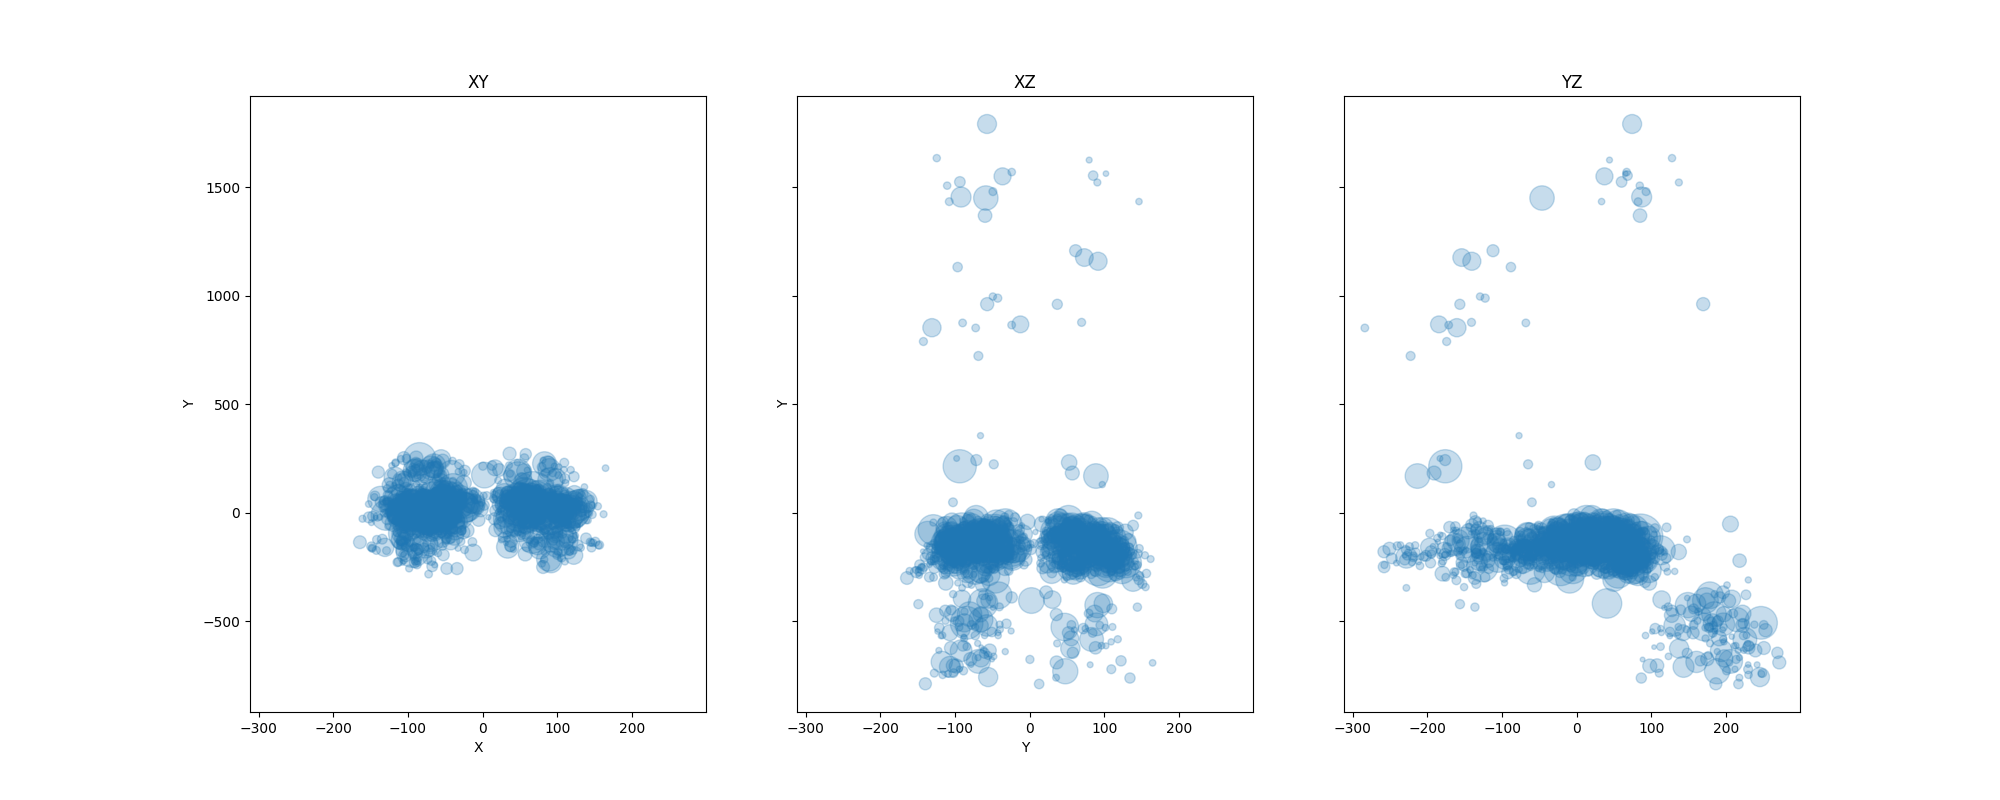

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True)
from mpl_toolkits.mplot3d import Axes3D
ax[0].scatter(ds.annotations.coordX, ds.annotations.coordY, s=ds.annotations.diameter_mm ** 2, alpha=0.25)
ax[0].set_xlabel("X")
ax[0].set_ylabel("Y")
ax[0].set_title("XY")
ax[1].scatter(ds.annotations.coordX, ds.annotations.coordZ, s=ds.annotations.diameter_mm ** 2, alpha=0.25)
ax[1].set_xlabel("X")
ax[1].set_ylabel("Z")
ax[1].set_title("XZ")
ax[2].scatter(ds.annotations.coordY, ds.annotations.coordZ, s=ds.annotations.diameter_mm ** 2, alpha=0.25)
ax[1].set_xlabel("Y")
ax[1].set_ylabel("Y")
ax[2].set_title("YZ")
plt.show()

<IPython.core.display.Javascript object>


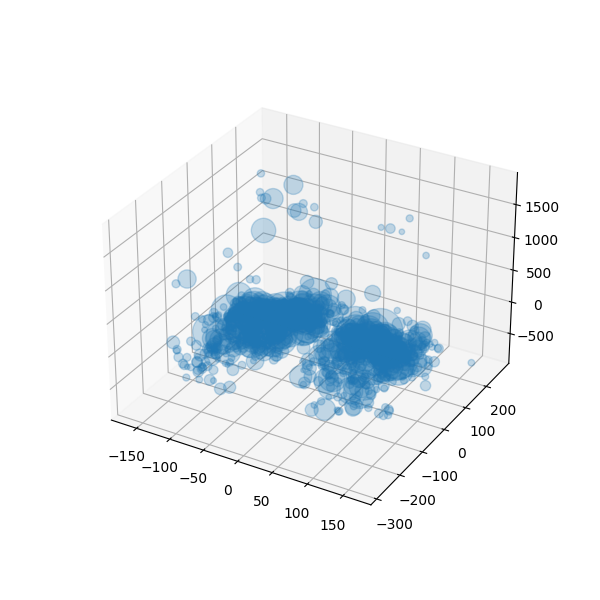

In [19]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
#plt.ion()
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ds.annotations.coordX, ds.annotations.coordY, ds.annotations.coordZ,  s=ds.annotations.diameter_mm ** 2, alpha=0.25)
#ax.scatter(2,3,4)
plt.show()